In [1]:
cd

C:\Users\56961


In [2]:
cd Desktop\portafolio

C:\Users\56961\Desktop\portafolio


In [3]:
get_ipython().magic('reset -sf')

C:\Users\56961\AppData\Local\Temp\ipykernel_18476\3674724974.py:1: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  get_ipython().magic('reset -sf')


In [4]:

# cargar librerias

# definir librerias
import random
import numpy as np
import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import networkx as nx
import pickle 
from collections import Counter
import csv

import networkx.algorithms.isomorphism as iso

import scipy.io as sio
import numpy as np
from datetime import datetime

import seaborn as sns
import pandas as pd
import numpy as np
import io

import warnings
warnings.filterwarnings('ignore', '.*do not.*', )
warnings.warn('DelftStack')
warnings.warn('Do not show this message')
import warnings
warnings.filterwarnings('ignore')

# cd :  usar cd para fijar y ver la direccion en la que se esta.

C:\Users\56961\AppData\Local\Temp\ipykernel_18476\693407569.py:30: UserWarning: DelftStack
  warnings.warn('DelftStack')


In [5]:
name_df= "data frame/data_frame_sin_falsos"

file = open(name_df, 'rb')
df_experimentacion= pickle.load(file)
file.close()

df_experimentacion['Num_metodo_est'] = df_experimentacion['Num_metodo_est'].replace("PIMPLE", "PIMLE")
df_experimentacion['Num_metodo_est'] = df_experimentacion['Num_metodo_est'].replace("EMV", "MLE")

# eliminar estimaciones no validas:
cond=df_experimentacion['Valor_error_rel(Exac - Est)'] != 1
df_experimentacion=df_experimentacion[cond]

df_experimentacion.head(2)


,Id_grafo,Tipo_grafo,Metodo_infeccion,Porc_infectados,Tipo_sample_p_gral,Porc_nodos_muestra,Num_metodo_est,Valor_Estimado,Valor_error(Exac - Est),Valor_error_rel(Exac - Est),Densidad,Parametro
0,0,escala,1,0.01,5,0.01,PIMLE,66.883480,-6.883480,-0.114725,10%,676
1,0,escala,1,0.01,5,0.01,MLE,67.176549,-7.176549,-0.119609,10%,676


# Inicio de graficas 

In [1]:
def graficar_sample_vs_ER_Summarize(df_sample,Tipo_sample_p_gral,L_met_est,size_figure, cond_contexto,xlim,ylim,act_legend,YLabel):
    Lalfa=[0.5,0.5,1,1,1]    
    dict_met_to_alfa={u:v for u,v in zip(L_met_est,Lalfa)}
    
    cant_colums=len(Tipo_sample_p_gral)
    dict_num_colum_to__type_sample={u:v for u,v in zip(range(cant_colums),Tipo_sample_p_gral)}

    cant_graficas=len(L_met_est)
    dict_num_grafica_to_est={u:v for u,v in zip(range(cant_graficas),L_met_est)}

    fig, axes = plt.subplots(1,cant_colums, figsize=size_figure, sharex=False, sharey=False)    
    NumExp=YLabel[-2]
    fig.suptitle("Aproximación densidad error relativo (Experimento "+NumExp+").")
    df_condicional=df_sample[cond_contexto]
    for num_col in range(cant_colums):     # L_met_est
        met_sample=dict_num_colum_to__type_sample[num_col]
        cond_1=df_condicional["Tipo_sample_p_gral"]==met_sample  # num_col ok
        df_col=df_condicional[cond_1]

        for grafica_i in range(cant_graficas): # L_prop_sample
            metodo_est=dict_num_grafica_to_est[grafica_i]            
            cond_2=df_col["Num_metodo_est"]==metodo_est  # grafica_i
            df_datos=df_col[cond_2]
            datos_i=list(df_datos["Valor_error_rel(Exac - Est)"])
            
            label_name=metodo_est+"."
            PAlfa=dict_met_to_alfa[metodo_est]
            sns.kdeplot(datos_i,bw=0.3, label=label_name, lw=1.5,ax=axes[num_col],alpha=PAlfa)
            #linea
            #LTypeline=["-","--","-.",",':'"]
            #line=LTypeline[0]
            if metodo_est=="RDS_II" or metodo_est=="RDS_I":
                line = axes[num_col].get_lines()[-1]# Obtén la línea del gráfico actual
                line.set_linestyle("-.")# Cambia el estilo de la línea a punteado


            axes[num_col].set_ylim(ylim)
            axes[num_col].set_xlim(xlim)
            axes[num_col].grid(True)
            if act_legend:
                axes[num_col].legend(loc='upper right',fontsize=9, framealpha=0.3)
            
        xlabel="Error relativo."
        axes[num_col].set_xlabel(xlabel,fontsize=10) 
        ylabel="Dens. Error relativo "+YLabel+"."
        axes[num_col].set_ylabel(ylabel,fontsize=10)      
        titulo="Err. rel v/s muestra tipo "+str(met_sample)+"."
        axes[num_col].set_title(titulo,fontsize=10) 
    plt.tight_layout()                            

In [2]:
## Grafica 1   ---------------------------------------------------------

Tipo_sample_p_gral=['5','6','7','8'] # variable 1
L_met_est=["PIMLE", "MLE","GNSUM","RDS_I","RDS_II"] # variable 2
#L_met_est=["PIMLE"]
size_figure=(12,15/4) # variable 3

delta=0.1
xlim=[delta-0.5,delta+0.5]
ylim=[0,25]
dict_met_to_ylim={u:v for u,v in zip(L_met_est,ylim)}
act_legend=True

size_sample=0.1
cond=df_experimentacion["Porc_nodos_muestra"]==size_sample
df_sample=df_experimentacion[cond]

cond_contexto=df_sample["Metodo_infeccion"]=="1"
YLabel="(Exp. 2)"
graficar_sample_vs_ER_Summarize(df_sample,Tipo_sample_p_gral,L_met_est,size_figure, cond_contexto,xlim,ylim,act_legend,YLabel)

NameError: name 'df_experimentacion' is not defined

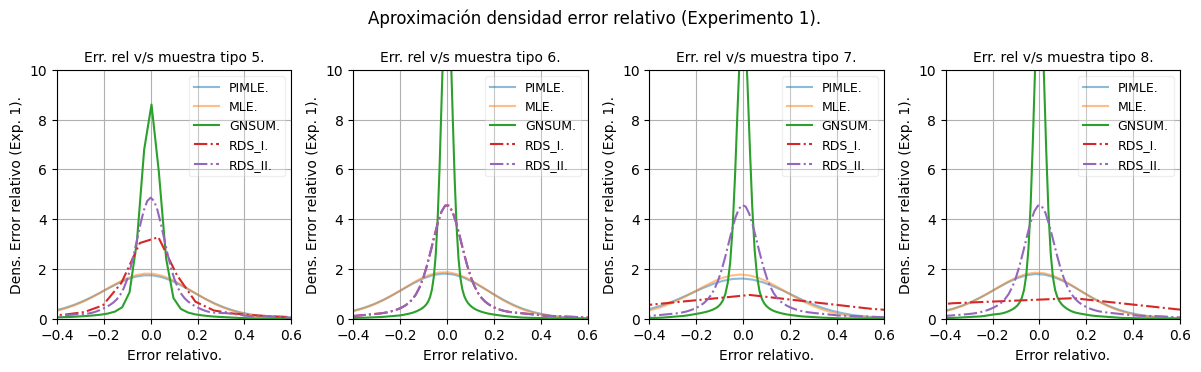

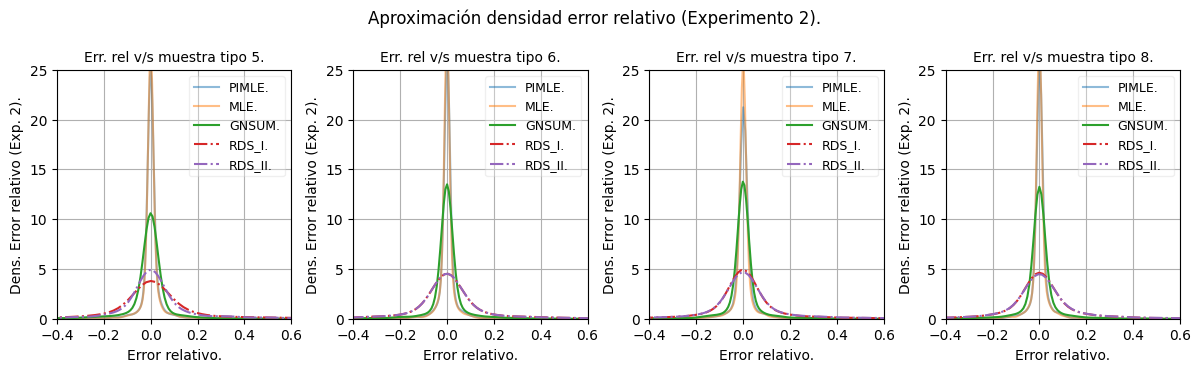

In [145]:
## Grafica 1   ---------------------------------------------------------

Tipo_sample_p_gral=['5','6','7','8'] # variable 1
L_met_est=["PIMLE", "MLE","GNSUM","RDS_I","RDS_II"] # variable 2
#L_met_est=["PIMLE"]
size_figure=(12,15/4) # variable 3

delta=0.1
xlim=[delta-0.5,delta+0.5]
ylim=[0,10]
dict_met_to_ylim={u:v for u,v in zip(L_met_est,ylim)}
act_legend=True

size_sample=0.1
cond=df_experimentacion["Porc_nodos_muestra"]==size_sample
df_sample=df_experimentacion[cond]

cond_contexto=df_sample["Porc_infectados"]!=100
YLabel="(Exp. 1)"
graficar_sample_vs_ER_Summarize(df_sample,Tipo_sample_p_gral,L_met_est,size_figure, cond_contexto,xlim,ylim,act_legend,YLabel)

## Grafica 2   ---------------------------------------------------------

Tipo_sample_p_gral=['5','6','7','8'] # variable 1
L_met_est=["PIMLE", "MLE","GNSUM","RDS_I","RDS_II"] # variable 2
size_figure=(12,15/4) # variable 3

delta=0.1
xlim=[delta-0.5,delta+0.5]
ylim=[0,25]
dict_met_to_ylim={u:v for u,v in zip(L_met_est,ylim)}
act_legend=True

size_sample=0.1
cond=df_experimentacion["Porc_nodos_muestra"]==size_sample
df_sample=df_experimentacion[cond]

cond_contexto=df_sample["Metodo_infeccion"]=="1"
YLabel="(Exp. 2)"
graficar_sample_vs_ER_Summarize(df_sample,Tipo_sample_p_gral,L_met_est,size_figure, cond_contexto,xlim,ylim,act_legend,YLabel)

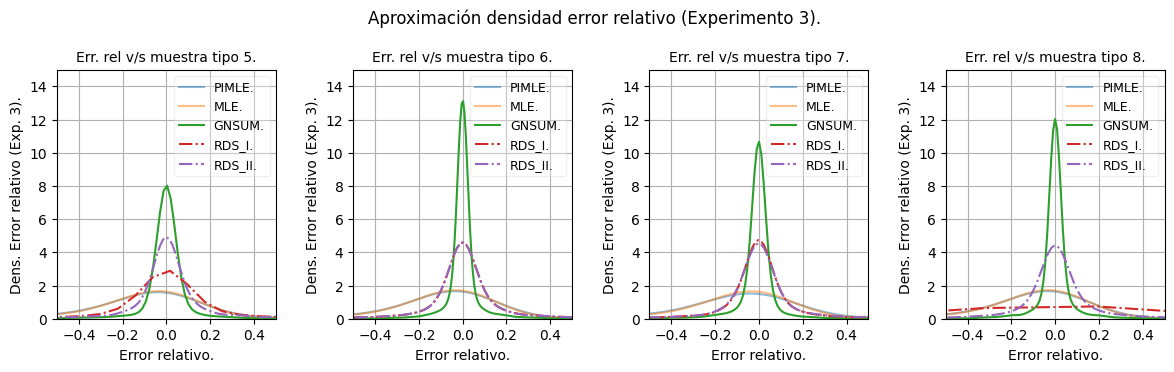

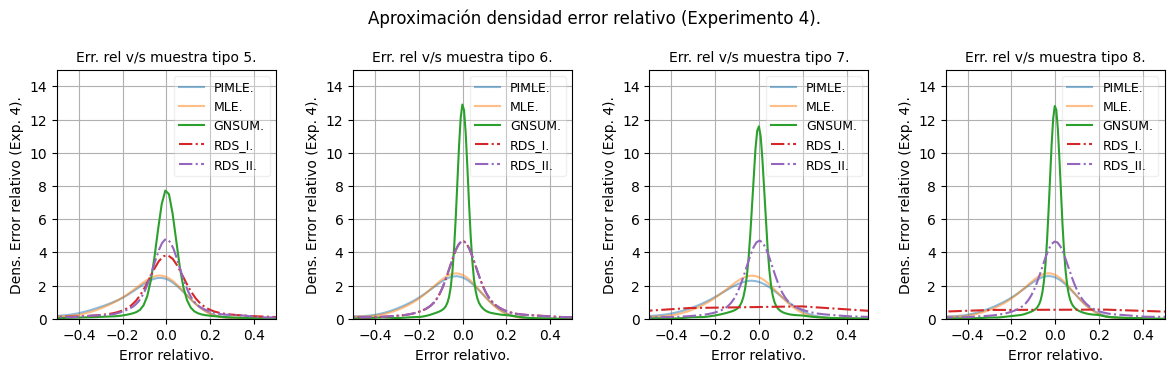

In [146]:
## Grafica 3   ---------------------------------------------------------

Tipo_sample_p_gral=['5','6','7','8'] # variable 1
L_met_est=["PIMLE", "MLE","GNSUM","RDS_I","RDS_II"] # variable 2
size_figure=(12,15/4) # variable 3

delta=0
xlim=[delta-0.5,delta+0.5]
ylim=[0,15]
dict_met_to_ylim={u:v for u,v in zip(L_met_est,ylim)}
act_legend=True

size_sample=0.1
cond=df_experimentacion["Porc_nodos_muestra"]==size_sample
df_sample=df_experimentacion[cond]


cond_contexto=df_sample["Metodo_infeccion"]=="4"
YLabel="(Exp. 3)"
graficar_sample_vs_ER_Summarize(df_sample,Tipo_sample_p_gral,L_met_est,size_figure, cond_contexto,xlim,ylim,act_legend,YLabel)

## Grafica 4   ---------------------------------------------------------

Tipo_sample_p_gral=['5','6','7','8'] # variable 1
L_met_est=["PIMLE", "MLE","GNSUM","RDS_I","RDS_II"] # variable 2
size_figure=(12,15/4) # variable 3

delta=0
xlim=[delta-0.5,delta+0.5]
ylim=[0,15]
dict_met_to_ylim={u:v for u,v in zip(L_met_est,ylim)}
act_legend=True

size_sample=0.1
cond=df_experimentacion["Porc_nodos_muestra"]==size_sample
df_sample=df_experimentacion[cond]


cond_contexto=df_sample["Metodo_infeccion"]=="DP"
YLabel="(Exp. 4)"
graficar_sample_vs_ER_Summarize(df_sample,Tipo_sample_p_gral,L_met_est,size_figure, cond_contexto,xlim,ylim,act_legend,YLabel)

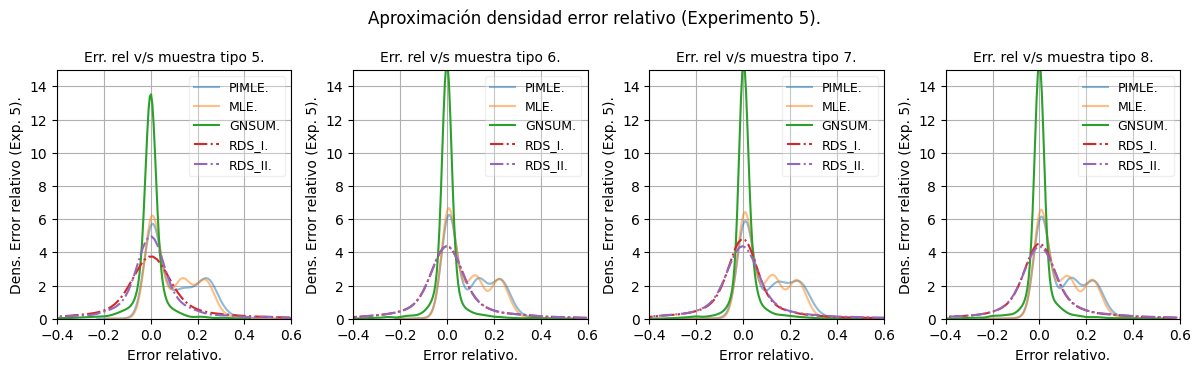

In [147]:
## Grafica 5   ---------------------------------------------------------

Tipo_sample_p_gral=['5','6','7','8'] # variable 1
L_met_est=["PIMLE", "MLE","GNSUM","RDS_I","RDS_II"] # variable 2
size_figure=(12,15/4) # variable 3

delta=0.1
xlim=[delta-0.5,delta+0.5]
ylim=[0,15]
dict_met_to_ylim={u:v for u,v in zip(L_met_est,ylim)}
act_legend=True

size_sample=0.1
cond=df_experimentacion["Porc_nodos_muestra"]==size_sample
df_sample=df_experimentacion[cond]


cond_contexto=df_sample["Metodo_infeccion"]=="IP"
YLabel="(Exp. 5)"
graficar_sample_vs_ER_Summarize(df_sample,Tipo_sample_p_gral,L_met_est,size_figure, cond_contexto,xlim,ylim,act_legend,YLabel)

(1, 1)

In [39]:
def graficar_sample_vs_ER_Summarize(df_sample,Tipo_sample_p_gral,L_met_est,size_figure, cond_contexto,xlim,ylim,act_legend,YLabel):
    Lalfa=[0.5,0.5,1,1,1]    
    dict_met_to_alfa={u:v for u,v in zip(L_met_est,Lalfa)}
    
    
    dict_col_to_R2={u:v for u,v in zip(list(range(0,4)),[(0,0),(0,1),(1,0),(1,1)]) }
    cant_colums=len(Tipo_sample_p_gral)
    dict_num_colum_to__type_sample={u:v for u,v in zip(range(cant_colums),Tipo_sample_p_gral)}

    cant_graficas=len(L_met_est)
    dict_num_grafica_to_est={u:v for u,v in zip(range(cant_graficas),L_met_est)}

    fig, axes = plt.subplots(2,2, figsize=size_figure, sharex=False, sharey=False)    
    NumExp=YLabel[-2]
    fig.suptitle("Aproximación densidad error relativo (Experimento "+NumExp+").")
    df_condicional=df_sample[cond_contexto]
    for num_col in range(cant_colums):     # L_met_est
        met_sample=dict_num_colum_to__type_sample[num_col]
        cond_1=df_condicional["Tipo_sample_p_gral"]==met_sample  # num_col ok
        df_col=df_condicional[cond_1]

        for grafica_i in range(cant_graficas): # L_prop_sample
            metodo_est=dict_num_grafica_to_est[grafica_i]            
            cond_2=df_col["Num_metodo_est"]==metodo_est  # grafica_i
            df_datos=df_col[cond_2]
            datos_i=list(df_datos["Valor_error_rel(Exac - Est)"])
            
            label_name=metodo_est+"."
            PAlfa=dict_met_to_alfa[metodo_est]
            f,c=dict_col_to_R2[num_col]
            sns.kdeplot(datos_i,bw=0.3, label=label_name, lw=1.5,ax=axes[f,c],alpha=PAlfa)
            #linea
            #LTypeline=["-","--","-.",",':'"]
            #line=LTypeline[0]
            if metodo_est=="RDS_II" or metodo_est=="RDS_I":
                line = axes[f,c].get_lines()[-1]# Obtén la línea del gráfico actual   
                line.set_linestyle("-.")# Cambia el estilo de la línea a punteado

            axes[f,c].set_ylim(ylim) 
            axes[f,c].set_xlim(xlim)
            axes[f,c].grid(True)
            if act_legend:
                axes[f,c].legend(loc='upper right',fontsize=11, framealpha=0.3)
            
        xlabel="Error relativo."
        axes[f,c].set_xlabel(xlabel,fontsize=10) 
        ylabel="Dens. Error relativo "+YLabel+"."
        axes[f,c].set_ylabel(ylabel,fontsize=10)      
        titulo="Err. rel v/s muestra tipo "+str(met_sample)+"."
        axes[f,c].set_title(titulo,fontsize=10) 
    plt.tight_layout()                            

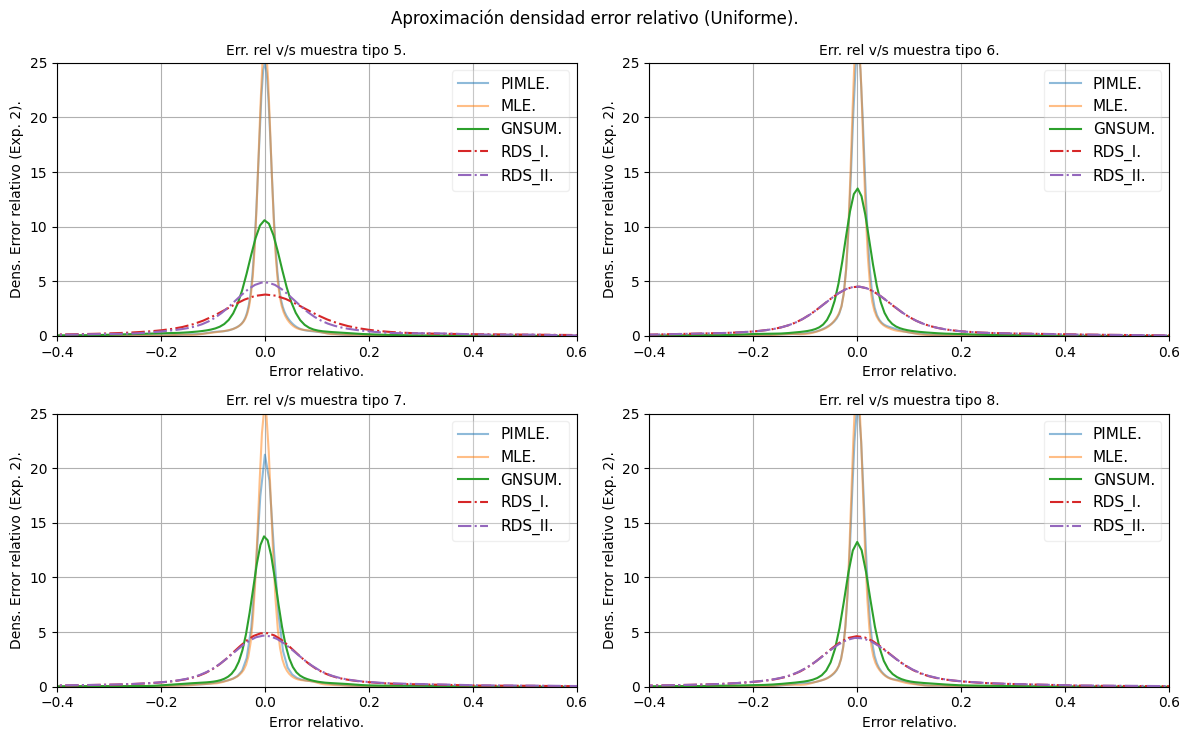

In [40]:
## Grafica 1   ---------------------------------------------------------

Tipo_sample_p_gral=['5','6','7','8'] # variable 1
L_met_est=["PIMLE", "MLE","GNSUM","RDS_I","RDS_II"] # variable 2
#L_met_est=["PIMLE"]
size_figure=(12,15/2) # variable 3

delta=0.1
xlim=[delta-0.5,delta+0.5]
ylim=[0,25]
dict_met_to_ylim={u:v for u,v in zip(L_met_est,ylim)}
act_legend=True

size_sample=0.1
cond=df_experimentacion["Porc_nodos_muestra"]==size_sample
df_sample=df_experimentacion[cond]

cond_contexto=df_sample["Metodo_infeccion"]=="1"
YLabel="(Exp. 2)"
graficar_sample_vs_ER_Summarize(df_sample,Tipo_sample_p_gral,L_met_est,size_figure, cond_contexto,xlim,ylim,act_legend,YLabel)

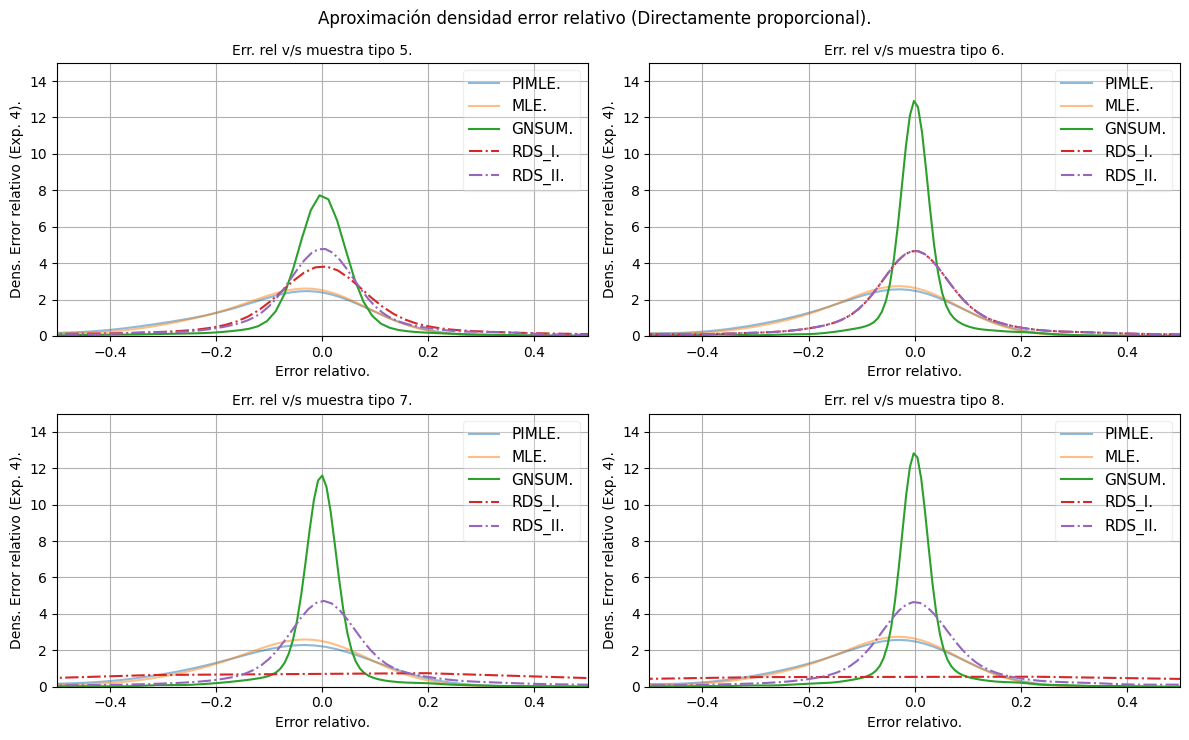

In [41]:
## Grafica 4   ---------------------------------------------------------

Tipo_sample_p_gral=['5','6','7','8'] # variable 1
L_met_est=["PIMLE", "MLE","GNSUM","RDS_I","RDS_II"] # variable 2
size_figure=(12,15/2) # variable 3

delta=0
xlim=[delta-0.5,delta+0.5]
ylim=[0,15]
dict_met_to_ylim={u:v for u,v in zip(L_met_est,ylim)}
act_legend=True

size_sample=0.1
cond=df_experimentacion["Porc_nodos_muestra"]==size_sample
df_sample=df_experimentacion[cond]

cond_contexto=df_sample["Metodo_infeccion"]=="DP"
YLabel="(Exp. 4)"
graficar_sample_vs_ER_Summarize(df_sample,Tipo_sample_p_gral,L_met_est,size_figure, cond_contexto,xlim,ylim,act_legend,YLabel)

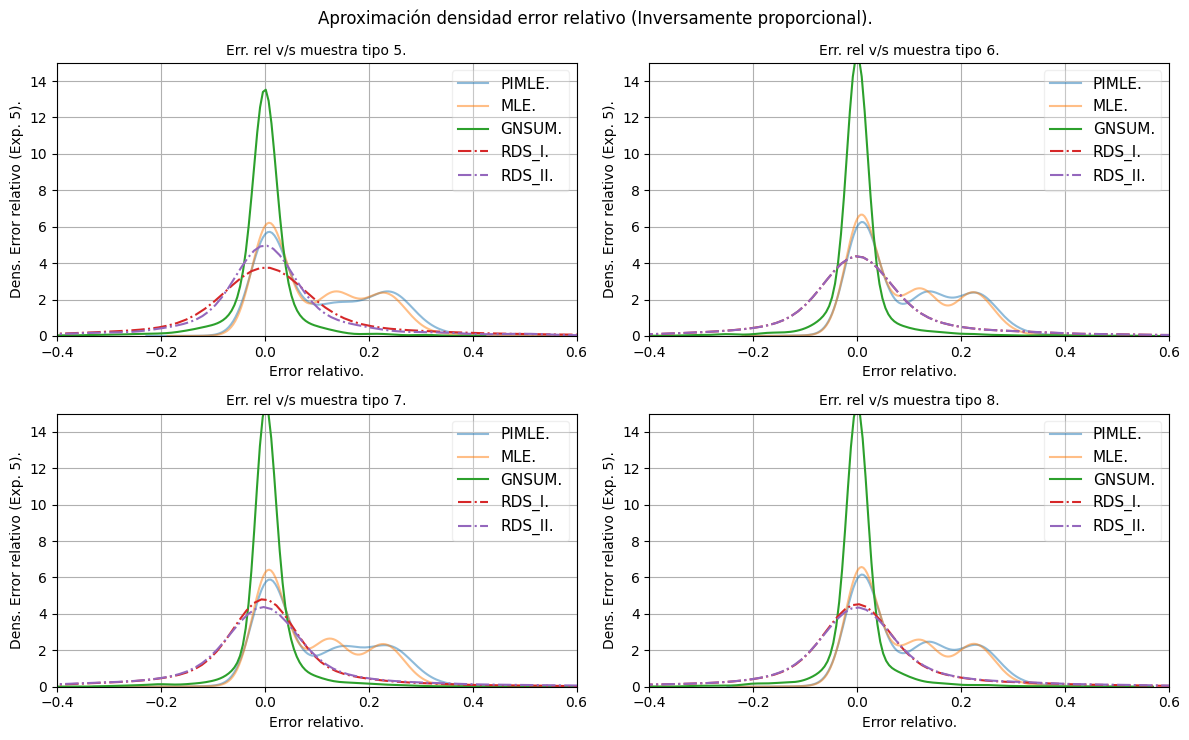

In [42]:
## Grafica 5   ---------------------------------------------------------

Tipo_sample_p_gral=['5','6','7','8'] # variable 1
L_met_est=["PIMLE", "MLE","GNSUM","RDS_I","RDS_II"] # variable 2
size_figure=(12,15/2) # variable 3

delta=0.1
xlim=[delta-0.5,delta+0.5]
ylim=[0,15]
dict_met_to_ylim={u:v for u,v in zip(L_met_est,ylim)}
act_legend=True

size_sample=0.1
cond=df_experimentacion["Porc_nodos_muestra"]==size_sample
df_sample=df_experimentacion[cond]

cond_contexto=df_sample["Metodo_infeccion"]=="IP"
YLabel="(Exp. 5)"
graficar_sample_vs_ER_Summarize(df_sample,Tipo_sample_p_gral,L_met_est,size_figure, cond_contexto,xlim,ylim,act_legend,YLabel)